In [2]:
from astropy.table import Table, Column
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
from stacker import stacker, ParStacker
from scipy.io import loadmat   
df_0 = pd.read_csv('../data/data_0.csv')
df_scaled = pd.read_csv('../data/data_scaled.csv')
tab = Table.read('../data/reduced_dr16q.fits')

# Loading parameters needed for reading specra file
FIBERID = tab['FIBERID']
MJD = tab['MJD']
PLATE = tab['PLATE']
Z = tab['Z']

In [4]:
#Making Median Spectra for each cluster found by dbscan
MatFile =loadmat('../dbscan/dbscan-idx-eps-1.5-mpt-10')
labels = MatFile['idx']
labels_np = np.array(labels)
num_clusters = max(labels)

cl_pop=[]
for cl in range(-1,14):
    pop=0
    for i in range(len(labels)):
        mask.append(labels.item(i)==cl)
        if(labels.item(i)==cl):
            pop=pop+1
    cl_pop.append(pop)
    MedSpec = stacker(Z[mask], PLATE[mask], MJD[mask], FIBERID[mask])
    np.savetxt('MedSpec-db-cl%d-tSNE-2d-eps-1.5-MinPts-10.dat' %cl, MedSpec)

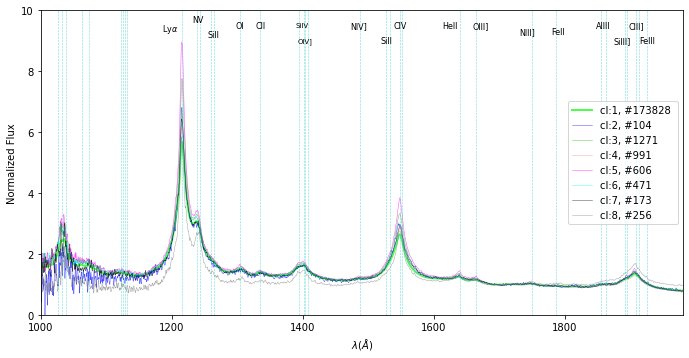

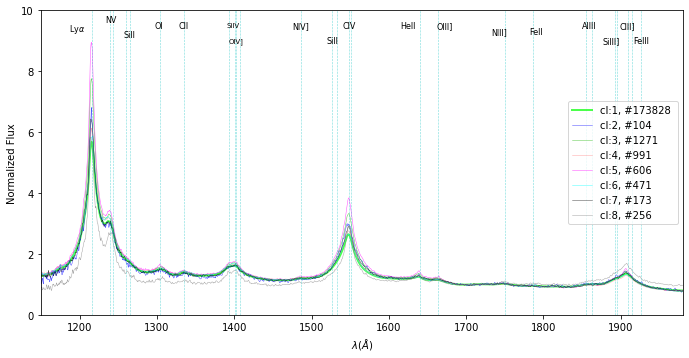

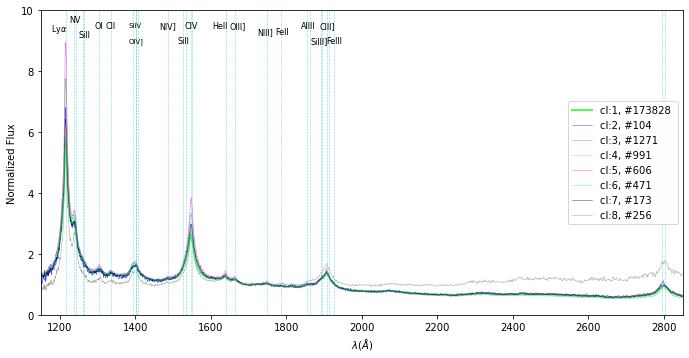

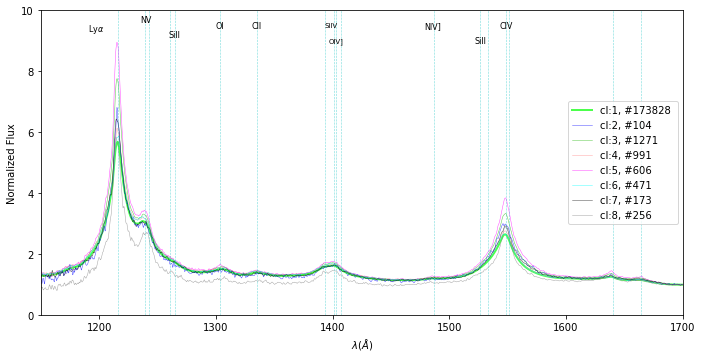

In [20]:
# Plotting Spectra 
from scipy import ndimage
from line_db import line_db

c=['gray', 'C0', 'C1', 'C2', 'C3' , 'darkred']
ymax=10

ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7

# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)

#  Median properties in each bin
color = loadmat('cmap.mat')
# color = color['cmap']

color=[ 
[0,	0, 0],
[1,0,0],
[0,	1, 0],
[0, 0, 1],
[0.1,.7,0],
[1,0.5,0.5],
[1,0,1],
[0,1,1],
[0,0,0],
[0.5,0.5,0.5]]
for ii in range(4):

    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))
    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    plt.ylabel('Normalized Flux')
    plt.xlabel(r'$\lambda  (\AA)$')
    x_median=lambda_min+200
  
    
    for cl in range(0,9):
        if(cl!=0):
    
            MedSpec = np.loadtxt('MedSpec-db-cl%d-tSNE-2d-eps-1.5-MinPts-10.dat' %cl)
            SmoothedMedSpec = ndimage.filters.gaussian_filter1d(MedSpec,2.0)
      
            # masking for plot ranges
            ind = (wgrid>lambda_min) & (wgrid<lambda_max)
    
            #plotting
            
            if(cl==1): 
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], c=color[cl], label = 'cl:%d, #%d '%(cl, cl_pop[cl+1]), lw=2, alpha=0.7)
            else:
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], c=color[cl], label = 'cl:%d, #%d '%(cl, cl_pop[cl+1]), lw=0.5, alpha=0.7)
                
    plt.legend(loc=7)
    line_db(ymax, fs, fs1, ii) 
    fig_path = 'med-spec-%d-%d-tSNE-db.png'%(lambda_min, lambda_max)
    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()


